In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines 

In [2]:
#data for the first plot------------------------
dx1 = [0]
dy1 = [0]

dx5 = [-10,-5,0,5,10, 0, 0]
dy5 = [0, 0, 0, 0, 0, -5, 5]

dx10 = [-10,-5,0,5,10, 0, 0, 0, 0]
dy10 = [0, 0, 0, 0, 0, -5, 5, -10, 10]

dx15 = [-10,-5,0,5,10, 0, 0]
dy15 = [0, 0, 0, 0, 0, -5, 5]

#labels
depth_values = {'1.5': (dx1,dy1), '5':(dx5,dy5), '10':(dx10,dy10), '15':(dx15,dy15)} 

In [3]:
#create a figure with this size
def plotdiagram(values, height=2+0.2, width=8):
    fig = plt.figure(figsize=(width, height), dpi=100)
    axes = fig.subplots(nrows=1,ncols=4, sharey=True) #create (1,4) subplots that share y axis

    #mark the ylabel in the first plot online
    axes[0].set_ylabel('Lateral (cm)')

    #iterate over all subplots 
    for ax, key in zip(axes, values.keys()):
        ax.plot(values[key][0], values[key][1], 'kx')
        ax.set_title('d = '+key+' cm')

    #for all subplots, set the xticks location and labels, and the yticks
    _ = plt.setp(axes, xticks=np.arange(-15, 16, step=5), xticklabels=['','20','25','30', '35', '40', ''], 
             yticks=np.arange(-15, 16, step=5))

    #rotate the xticks labels 90 degrees
    for ax in axes:
        ax.tick_params(axis='x', rotation=90)

    #annotate x,y
    plt.annotate("Longitudinal distance from isocenter (cm)", (0.35,0.04), xycoords='figure fraction')
    fig.subplots_adjust(bottom=0.3) #controls the padding at the bottom of the figure
    
    return fig, axes

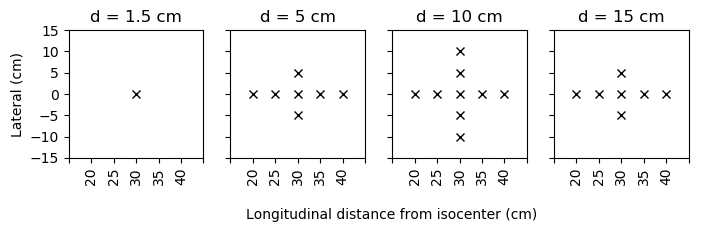

In [7]:
fig, axes= plotdiagram(values=depth_values)
#fig.savefig('../images/location_grid1.png', dpi=300)

In [11]:
#data for the second plot------------------------
dx1 = [0]
dy1 = [0]

dx5 = [-10,0,10]
dy5 = [0, 0, 0]

dx10 = [-10,-5,0,5,10, 0, 0]
dy10 = [0, 0, 0, 0, 0, -10, 10]

dx15 = [-10,0,10]
dy15 = [0, 0, 0]

#labels
depth_values2 = {'1.5': (dx1,dy1), '5':(dx5,dy5), '10':(dx10,dy10), '15':(dx15,dy15)} 

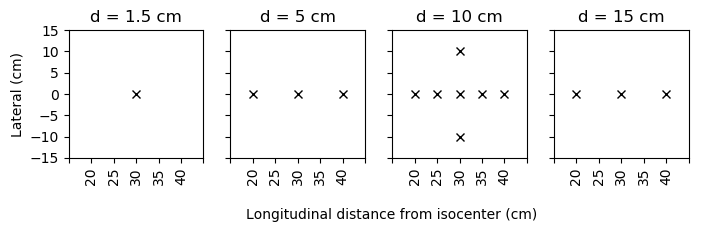

In [12]:
fig, axes= plotdiagram(values=depth_values2)
#fig.savefig('../images/location_grid2.png', dpi=300)

In [13]:
#modified version of the function that allows to combine both plots into one
def plotdiagrams(values, height=2+0.2, width=8, fig=None, axes=None, marker='x', color='black'):
    if fig is None:
        fig = plt.figure(figsize=(width, height), dpi=100)
    if axes is None:
        axes = fig.subplots(nrows=1,ncols=4, sharey=True) #create (1,4) subplots that share y axis

    #mark the ylabel in the first plot online
    axes[0].set_ylabel('Lateral (cm)')

    #iterate over all subplots
    for ax, key in zip(axes, values.keys()):
        plot, = ax.plot(values[key][0], values[key][1], marker=marker, color=color, linestyle='')
        ax.set_title('d = '+key+' cm')

    #for all subplots, set the xticks location and labels, and the yticks
    _ = plt.setp(axes, xticks=np.arange(-15, 16, step=5), xticklabels=['','20','25','30', '35', '40', ''], 
             yticks=np.arange(-15, 16, step=5))

    #rotate the xticks labels 90 degrees
    for ax in axes:
        ax.tick_params(axis='x', rotation=90)

    #annotate x,y
    plt.annotate("Longitudinal distance from isocenter (cm)", (0.35,0.04), xycoords='figure fraction')
    fig.subplots_adjust(bottom=0.3) #controls the padding at the bottom of the figure
    
    return fig, axes

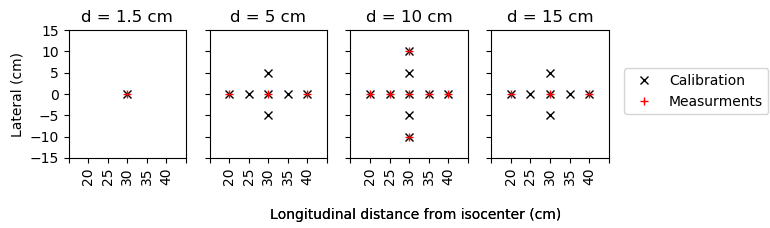

In [15]:
#use the function to create the plots
fig, axes= plotdiagrams(values=depth_values)
fig, axes= plotdiagrams(values=depth_values2,  fig=fig, axes=axes, marker='+', color='red')

#creating the legend
calibration = mlines.Line2D([], [], color='black', marker='x', linestyle='', label='Calibration') #create handle for the legend
measurement = mlines.Line2D([], [], color='red', marker='+', linestyle='', label='Measurments')
fig.subplots_adjust(right=0.8) #control padding to the right of subplots
fig.legend(handles=[calibration, measurement], loc=(0.81,0.5)) #place the legend on the figure

fig.savefig('../images/location_grid.png', dpi=80)